In [293]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [294]:
df=pd.read_csv(r"superheated_vapor_properties.csv")

In [295]:
df.head()

,Pressure,Property,Liq_Sat,Vap_Sat,75,100,125,150,175,200,...,425,450,475,500,525,550,575,600,625,650
0,1.0,V,1.000,129200.0000,160640.0000,172180.0000,183720.0000,195270.0000,206810.0000,218350.0000,...,NaN,333730.00,NaN,356810.0000,NaN,379880.0000,NaN,402960.0000,NaN,426040.0000
1,1.0,U,29.334,2385.2000,2480.8000,2516.4000,2552.3000,2588.5000,2624.9000,2661.7000,...,NaN,3049.90,NaN,3132.4000,NaN,3216.7000,NaN,3302.6000,NaN,3390.3000
2,1.0,H,29.335,2514.4000,2641.5000,2688.6000,2736.0000,2783.7000,2831.7000,2880.1000,...,NaN,3383.60,NaN,3489.2000,NaN,3596.5000,NaN,3705.6000,NaN,3816.4000
3,1.0,S,0.106,8.9767,9.3828,9.5136,9.6365,9.7527,9.8629,9.9679,...,NaN,10.82,NaN,10.9612,NaN,11.0957,NaN,11.2243,NaN,11.3476
4,10.0,V,1.010,14670.0000,16030.0000,17190.0000,18350.0000,19510.0000,20660.0000,21820.0000,...,NaN,33370.00,NaN,35670.0000,NaN,37980.0000,NaN,40290.0000,NaN,42600.0000


In [296]:
p1=[]
p2=[]
p3=[]
for i in range(0,df.shape[0],4):
    if(df["Pressure"][i]<300):
        p1.append(df["Vap_Sat"][i])
    if(df["Pressure"][i]>=300 and df["Pressure"][i]<=1500 ):
        p2.append(df["Vap_Sat"][i])
    if(df["Pressure"][i]>1500):
        p3.append(df["Vap_Sat"][i])
        

In [297]:
df.shape

(544, 37)

In [298]:
len(p1)

16

In [299]:
len(p2)

39

In [300]:
len(p3)

81

In [301]:
p1_1=[df["Pressure"][i] for i in range(0,544,4) if df["Pressure"][i]<300]
p2_2=[df["Pressure"][i] for i in range(0,544,4) if (df["Pressure"][i]>=300 and df["Pressure"][i]<=1500)]
p3_3=[df["Pressure"][i] for i in range(0,544,4) if df["Pressure"][i]>1500]

In [302]:
print(len(p1_1),len(p2_2),len(p3_3))

16 39 81


 dataset 1 : pressure <300

In [303]:
x1=np.array(p1_1).reshape(-1,1)

In [304]:
y1=np.array(p1).reshape(-1,1)

In [305]:
print(x1.shape,y1.shape)

(16, 1) (16, 1)


In [306]:
u=x1.mean(axis=0)
std=x1.std(axis=0)
x1=(x1-u)/std


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


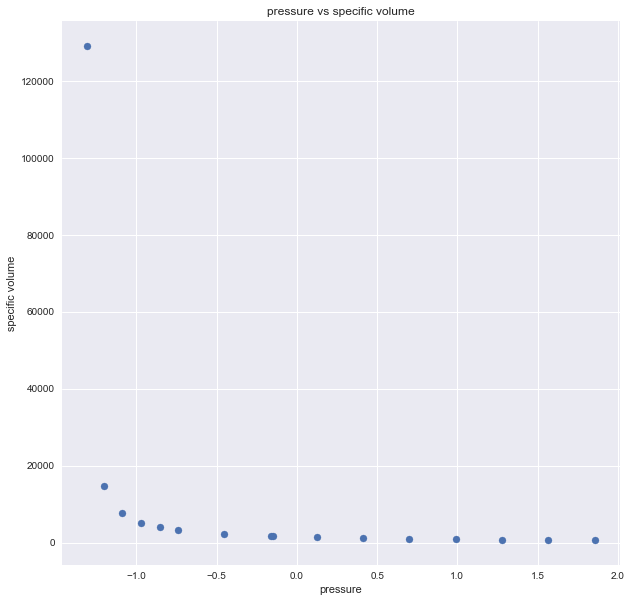

In [307]:
plt.style.use("seaborn")
plt.figure(figsize=(10,10))
plt.scatter(x1,y1)
plt.title("pressure vs specific volume")
plt.xlabel("pressure")
plt.ylabel("specific volume")
plt.legend()
plt.show()

In [308]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x1,y1)

LinearRegression()

In [309]:
y_pred=model.predict(x1)
y_pred.shape

(16, 1)

In [310]:
y_pred

array([[ 27462.70127647],
       [ 26154.7003303 ],
       [ 24701.36594568],
       [ 23248.03156105],
       [ 21794.69717642],
       [ 20341.36279179],
       [ 16708.02683023],
       [ 13074.69086866],
       [ 12882.1240627 ],
       [  9441.35490709],
       [  5808.01894552],
       [  2174.68298395],
       [ -1458.65297761],
       [ -5091.98893918],
       [ -8725.32490075],
       [-12358.66086232]])

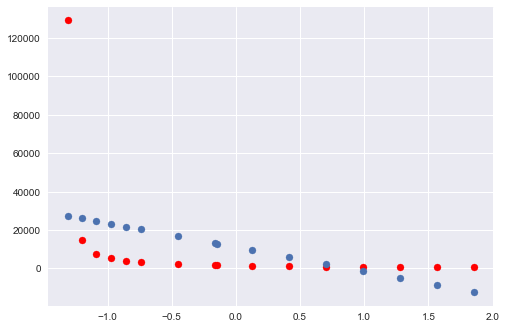

In [311]:
plt.scatter(x1,y1,c="red")
plt.scatter(x1,y_pred)

In [312]:
from sklearn.metrics import r2_score
r=r2_score(y1,y_pred)

In [322]:
print(r,model.coef_,model.intercept_)

0.16815590648253187 [[-12596.62249278]] [11009.820625]


In [314]:
def hypothesis(x,theta):
    y_= x*theta[1]+theta[0]
    return y_
def gradient(X,Y,theta):
    m=X.shape[0]
    grad=np.zeros((2,))
    for i in range(m):
        #x=X[i]
        y_=hypothesis(X[i],theta)
        grad[0]+=y_-Y[i]
        grad[1]+=(y_-Y[i])*X[i]
    return grad/m

def gradient_descent(X,Y,max=30,lr=0.1):
    theta=np.zeros((2,))
    error_list=[]
    
    for i in range(max):
        # update theta
        grad=gradient(X,Y,theta)
        theta[0]=theta[0]-lr*grad[0]
       
        
        theta[1]=theta[1]-lr*grad[1]
        #print(theta[0],theta[1])
        #print(grad)
        #e=error(X,Y,theta)
        #error_list.append(e)
    return theta
        

In [315]:
theta=gradient_descent(x1,y1)

In [323]:
theta # this is the slope and the intercept

array([ 10543.1015763 , -12062.63707495])

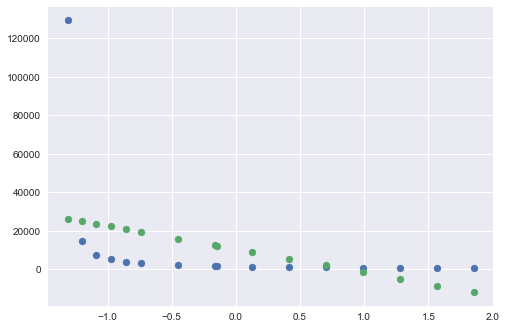

In [317]:
y_pred0=hypothesis(x1,theta)
plt.scatter(x1,y1)
plt.scatter(x1,y_pred0)

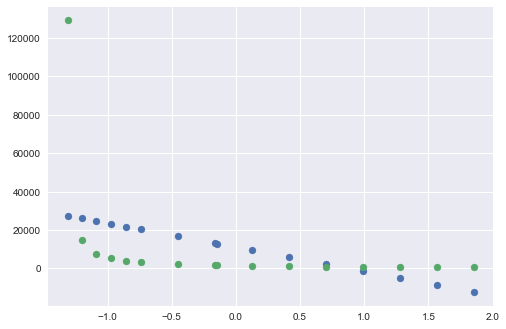

In [318]:
def hypothesis(m,c,x):
    return m*x+c
def loss1(y_,y):
    return np.mean((y_-y)**2)
def gradient_b(m,c,x,y):
    y_= hypothesis(m,c,x)
    #print(y_.shape)
    return (y_-y).sum(axis=0)/(y_.shape[0])
def gradient_m(m,c,x,y):
    y_=hypothesis(m,c,x)
    return ((y_-y)*x).sum(axis=0)/(y_.shape[0])

def linear_regression(x,y,max_iter=5000,lr=0.1):
    # there is only one variant theta so take it as m1
    loss=[]
    m1=np.random.randn(1)
    b1=np.random.randn(1)
    m=x.shape[0]
    for i in range(max_iter):
        m1=m1-gradient_m(m1,b1,x,y)*lr
        b1=b1-gradient_b(m1,b1,x,y)*lr
        #print(m1,b1)
        
        y1=hypothesis(m1,b1,x)
        l=loss1(y1,y)
        
        loss.append(l)
    

    return (m1,b1,loss)
(m1,b1,loss)=linear_regression(x1,y1)
y_pred=hypothesis(m1,b1,x1)
plt.scatter(x1,y_pred)
plt.scatter(x1,y1)

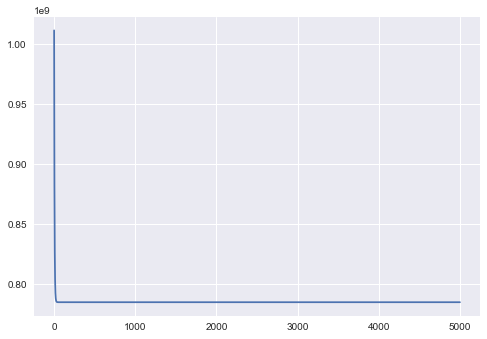

In [319]:
plt.plot(loss)

In [325]:
print(r2_score(y1,y_pred),theta)

0.16815590648253198 [ 10543.1015763  -12062.63707495]


# datasets 2 : pressure>300 and pressure<1500
        

In [326]:
x2=np.array(p2_2).reshape(-1,1)
y2=np.array(p2).reshape(-1,1)

In [327]:
print(x2.shape,y2.shape)

(39, 1) (39, 1)


## Normalizing dataset

In [328]:
u=x2.mean(axis=0)
std=x2.std(axis=0)
x2=(x2-u)/std


In [329]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x2,y2)

LinearRegression()

In [330]:
y_pred=model.predict(x2)
y_pred.shape

(39, 1)

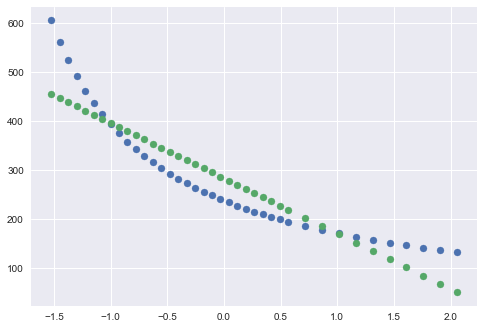

In [331]:
plt.scatter(x2,y2)
plt.scatter(x2,y_pred)

In [336]:
r1=r2_score(y2,y_pred)
print(r1,model.coef_,model.intercept_)

0.8335613390956468 [[-113.14919758]] [282.70820513]


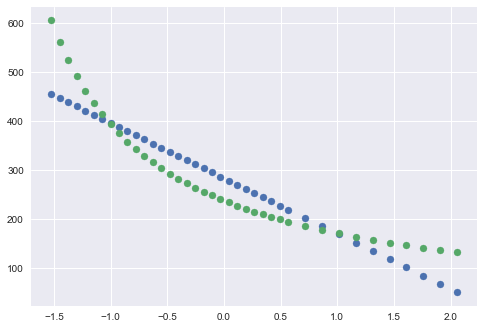

In [337]:
(m1,b1,loss)=linear_regression(x2,y2)
y_pred=hypothesis(m1,b1,x2)
#plt.scatter(x2,y2,c='red')
plt.scatter(x2,y_pred)
plt.scatter(x2,y2)

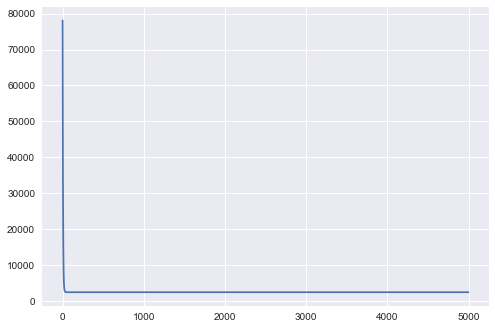

In [338]:
plt.plot(loss)

In [341]:
r1=r2_score(y2,y_pred)
print(r1,m1,b1)

0.8335613390956468 [-113.14919758] [282.70820513]


## dataset 3: p>1500

In [342]:
x3=np.array(p3_3).reshape(-1,1)
y3=np.array(p3).reshape(-1,1)

In [343]:

print(x3.shape,y3.shape)

(81, 1) (81, 1)


In [344]:
u=x3.mean(axis=0)
std=x3.std(axis=0)
x3=(x3-u)/std


In [345]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x3,y3)

LinearRegression()

In [346]:
y_pred=model.predict(x3)
y_pred.shape

(81, 1)

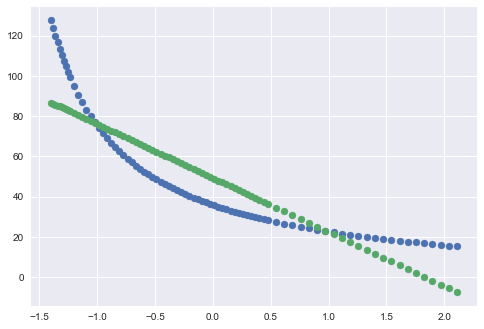

In [347]:
plt.scatter(x3,y3)
plt.scatter(x3,y_pred)

In [348]:
r1=r2_score(y3,y_pred)
print(r1,model.coef_,model.intercept_)

0.7683587450628104 [[-26.87471568]] [49.20474074]


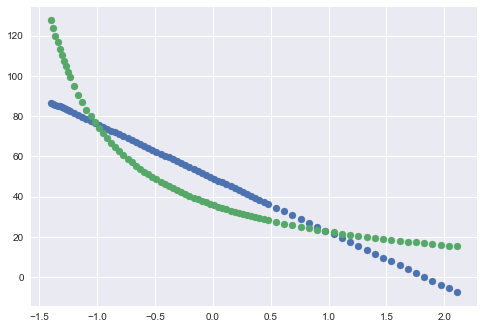

In [349]:
(m1,b1,loss)=linear_regression(x3,y3)
y_pred=hypothesis(m1,b1,x3)
#plt.scatter(x2,y2,c='red')
plt.scatter(x3,y_pred)
plt.scatter(x3,y3)

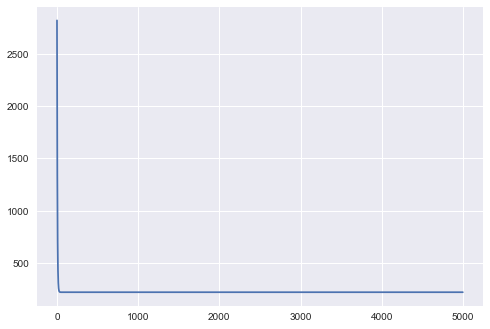

In [350]:
plt.plot(loss)

In [352]:
r1=r2_score(y3,y_pred)
print(r1,m1,b1)

0.7683587450628104 [-26.87471568] [49.20474074]


###### results are almost same from sklearn and linear regression from scratch after normalization of data

###### otherwise we have some unusual values without normalization due high deviation of data